* 요일: &we=[0, 2, 3, 4, 5, 6] <br>
* 전체, 홈, 원정: &ha, &ha=H or &ha=N <br>
* 구단(14-24): &ct=[1, 2, 3, 6, 7, 9, 11, 12, 13] <br>
기아: 2
삼성: 1
두산: 6
SSG: 9
롯데: 3
한화: 7
엔씨: 12
KT: 13
키움: 11

**컬럼명 해설**<br>
```python
df_kia_thu.columns

Index(['Year', 'G', 'GS', 'W', 'L', 'S', 'HD', 'IP', 'R', 'ER', 'RS', 'RS9',
       'TBF', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'IB', 'HP', 'SO', 'SF', 'NP',
       'WHIP', 'AVG', 'OBP', 'OPS', 'ERA'],
      dtype='object')
```

연도, 게임 수, 선발, 이긴 경기 수, 진 경기 수, 세이브, 홀드, 이닝 수, 득점, 자책점, 득점 지원, 9이닝당 득점지원, 상대한 타자 수, 상대팀 타수, 안타, 2루타, 3루타, 홈런, 4구, 고의 4구, 사구, 삼진, 희생플라이, 투구 수, 이닝당 출루 허용률, 피안타율, 피출루율, 피OPS, 평균자책점

In [112]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import requests
from re import escape
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

plt.rcParams['font.family'] = 'Malgun Gothic'

---

# 1. 전체

In [113]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

team_list = [1, 2, 3, 6, 7, 9, 11, 12, 13]  #삼성, 기아, 롯데, 두산, 한화, SSG, 키움, 엔씨, KT
df_team_list = []    #전체 구단 데이터프레임 담을 리스트

for team in team_list:
    url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha&ct={}&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='.format(team)
    driver.get(url)

    try:
        div = WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.CLASS_NAME, "table_type01"))
        )
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        div_content = soup.find('div', class_='table_type01 transverse_scroll cbox')

        print(team)
        print(url)

        if div_content:
            first_table = div_content.find('table') #첫 번째 table 태그만 가져옴

        #헤더 추출
        headers = [th.text.strip() for th in first_table.find_all('th')]

        #데이터프레임 컬럼을 만들기 위해 불필요한 헤더 삭제
        rm = ['Rank', 'Season', 'Year▲', '비율', 'Year']    #삭제할 헤더명
        idx = [i for i, x in enumerate(headers) if x in rm] #삭제할 헤더 index

        columns = [x for i, x in enumerate(headers) if i not in idx]    #삭제 후 남은 헤더
        columns[0] = 'Year' #컬럼명 변경: 정렬▲ → Year

        columns = np.array(columns)

        #각 컬럼값
        tr = div_content.find("tbody").find_all('tr')

        rows = []   #각 컬럼값 담을 리스트

        for tr in first_table.find('tbody').find_all('tr'):
            cells = [td.text.strip() for td in tr.find_all('td')]
            rows.append(cells)

        for i in range(len(rows)):
            rows[i] = rows[i][3:]   #불필요한 컬럼 삭제

        df = pd.DataFrame(rows, columns=columns)    #데이터프레임 생성
        df_team_list.append(df) #생성한 데이터프레임 리스트에 추가

    except Exception as e:
        print("요소를 찾을 수 없음: ", e)

    
df_team = pd.concat(df_team_list)   #전체 데이터프레임 결합

#컬럼 순서 변경: 헤더 가져올 때 순서가 변경됨
col_list = list(df_team.columns)
col_list[-5:] = ['WHIP', 'AVG', 'OBP', 'OPS', 'ERA']
df_team.columns = col_list

#데이터타입 변경
df_team = df_team.astype(float)

#연도 데이터 타입 정수형으로 변경
df_team.Year = df_team.Year.astype(int)

df_team

1
https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha&ct=1&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=
2
https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha&ct=2&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=
3
https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=&hr=&ha&ct=3&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=
6
https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2015&ey=2024&te=5002&po

,Year,G,GS,W,L,S,HD,IP,R,ER,...,IB,HP,SO,SF,NP,WHIP,AVG,OBP,OPS,ERA
0,2015,71.0,16.0,5.0,11.0,3.0,1.0,139.0,109.0,101.0,...,3.0,9.0,92.0,7.0,2438.0,1.50,0.285,0.357,0.845,6.54
1,2016,70.0,16.0,7.0,9.0,0.0,7.0,140.0,88.0,84.0,...,1.0,14.0,82.0,6.0,2432.0,1.56,0.286,0.369,0.781,5.40
2,2017,61.0,16.0,10.0,6.0,3.0,3.0,143.0,82.0,71.0,...,2.0,8.0,100.0,7.0,2332.0,1.25,0.262,0.309,0.702,4.47
3,2018,67.0,16.0,9.0,7.0,3.0,7.0,141.0,94.0,81.0,...,0.0,8.0,122.0,6.0,2397.0,1.50,0.291,0.348,0.774,5.17
4,2019,57.0,16.0,10.0,6.0,6.0,3.0,142.0,66.0,53.0,...,1.0,10.0,117.0,5.0,2323.0,1.20,0.244,0.304,0.673,3.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2020,82.0,16.0,9.0,7.0,3.0,8.0,145.0,90.0,84.0,...,1.0,11.0,114.0,4.0,2498.0,1.55,0.297,0.372,0.828,5.21
6,2021,73.0,16.0,6.0,8.0,3.0,8.0,142.0,75.0,67.0,...,2.0,7.0,114.0,3.0,2399.0,1.37,0.244,0.331,0.672,4.25
7,2022,85.0,16.0,9.0,7.0,4.0,13.0,143.1,59.0,51.0,...,3.0,3.0,123.0,3.0,2443.0,1.20,0.227,0.295,0.633,3.20
8,2023,92.0,16.0,10.0,6.0,4.0,20.0,146.1,85.0,74.0,...,2.0,5.0,106.0,5.0,2601.0,1.57,0.285,0.359,0.756,4.55


In [114]:
#'승률' 컬럼 추가
df_team['winning_rate'] = (df_team['W'] / df_team['G'] *100).round(2)
df_team

,Year,G,GS,W,L,S,HD,IP,R,ER,...,HP,SO,SF,NP,WHIP,AVG,OBP,OPS,ERA,winning_rate
0,2015,71.0,16.0,5.0,11.0,3.0,1.0,139.0,109.0,101.0,...,9.0,92.0,7.0,2438.0,1.50,0.285,0.357,0.845,6.54,7.04
1,2016,70.0,16.0,7.0,9.0,0.0,7.0,140.0,88.0,84.0,...,14.0,82.0,6.0,2432.0,1.56,0.286,0.369,0.781,5.40,10.00
2,2017,61.0,16.0,10.0,6.0,3.0,3.0,143.0,82.0,71.0,...,8.0,100.0,7.0,2332.0,1.25,0.262,0.309,0.702,4.47,16.39
3,2018,67.0,16.0,9.0,7.0,3.0,7.0,141.0,94.0,81.0,...,8.0,122.0,6.0,2397.0,1.50,0.291,0.348,0.774,5.17,13.43
4,2019,57.0,16.0,10.0,6.0,6.0,3.0,142.0,66.0,53.0,...,10.0,117.0,5.0,2323.0,1.20,0.244,0.304,0.673,3.36,17.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2020,82.0,16.0,9.0,7.0,3.0,8.0,145.0,90.0,84.0,...,11.0,114.0,4.0,2498.0,1.55,0.297,0.372,0.828,5.21,10.98
6,2021,73.0,16.0,6.0,8.0,3.0,8.0,142.0,75.0,67.0,...,7.0,114.0,3.0,2399.0,1.37,0.244,0.331,0.672,4.25,8.22
7,2022,85.0,16.0,9.0,7.0,4.0,13.0,143.1,59.0,51.0,...,3.0,123.0,3.0,2443.0,1.20,0.227,0.295,0.633,3.20,10.59
8,2023,92.0,16.0,10.0,6.0,4.0,20.0,146.1,85.0,74.0,...,5.0,106.0,5.0,2601.0,1.57,0.285,0.359,0.756,4.55,10.87


In [115]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 9
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          90 non-null     int32  
 1   G             90 non-null     float64
 2   GS            90 non-null     float64
 3   W             90 non-null     float64
 4   L             90 non-null     float64
 5   S             90 non-null     float64
 6   HD            90 non-null     float64
 7   IP            90 non-null     float64
 8   R             90 non-null     float64
 9   ER            90 non-null     float64
 10  RS            90 non-null     float64
 11  RS9           90 non-null     float64
 12  TBF           90 non-null     float64
 13  AB            90 non-null     float64
 14  H             90 non-null     float64
 15  2B            90 non-null     float64
 16  3B            90 non-null     float64
 17  HR            90 non-null     float64
 18  BB            90 non-null     float64


In [116]:
df_team.describe()

,Year,G,GS,W,L,S,HD,IP,R,ER,...,HP,SO,SF,NP,WHIP,AVG,OBP,OPS,ERA,winning_rate
count,90.000000,90.000000,90.0,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,2019.500000,73.922222,16.0,8.344444,7.288889,3.755556,7.800000,142.341111,75.200000,67.533333,...,9.866667,113.333333,5.433333,2396.188889,1.398778,0.265000,0.338744,0.725922,4.271000,11.370889
std,2.888373,8.147830,0.0,2.219227,2.264749,1.602744,3.880808,2.772128,17.230884,16.102341,...,3.901023,14.402715,2.360965,113.605655,0.163417,0.027278,0.027023,0.070949,1.033437,3.140880
min,2015.000000,57.000000,16.0,1.000000,3.000000,0.000000,0.000000,135.100000,42.000000,36.000000,...,3.000000,82.000000,1.000000,2172.000000,1.140000,0.214000,0.293000,0.591000,2.280000,1.450000
25%,2017.000000,67.000000,16.0,7.000000,6.000000,3.000000,5.000000,140.100000,61.250000,54.250000,...,7.000000,106.000000,4.000000,2323.250000,1.272500,0.244000,0.317250,0.673000,3.510000,9.052500
50%,2019.500000,73.000000,16.0,8.500000,7.000000,4.000000,8.000000,142.000000,74.500000,67.000000,...,10.000000,114.000000,5.000000,2394.500000,1.370000,0.265500,0.339000,0.723500,4.240000,11.180000
75%,2022.000000,80.000000,16.0,10.000000,9.000000,5.000000,10.000000,144.200000,85.000000,77.000000,...,12.000000,122.750000,7.000000,2443.000000,1.510000,0.282500,0.358000,0.773250,4.910000,13.467500
max,2024.000000,92.000000,16.0,13.000000,15.000000,8.000000,21.000000,150.000000,128.000000,113.000000,...,22.000000,157.000000,12.000000,2707.000000,1.870000,0.340000,0.404000,0.928000,7.150000,20.000000


In [120]:
# 승률이 평균 이상
win_avg = df_team['winning_rate'].mean()    #승률 컬럼 평균값
df_team_win = df_team[df_team['winning_rate'] >= win_avg].iloc[:, 5:]

df_team_win_hitter = df_team_win.iloc[:, list(range(9, 19)) + [-1]].astype(int)  #타자
df_team_win_pitcher = df_team_win.drop(df_team_win.columns[9:19], axis=1)

c:\Users\m\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()


<Axes: >

c:\Users\m\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\m\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


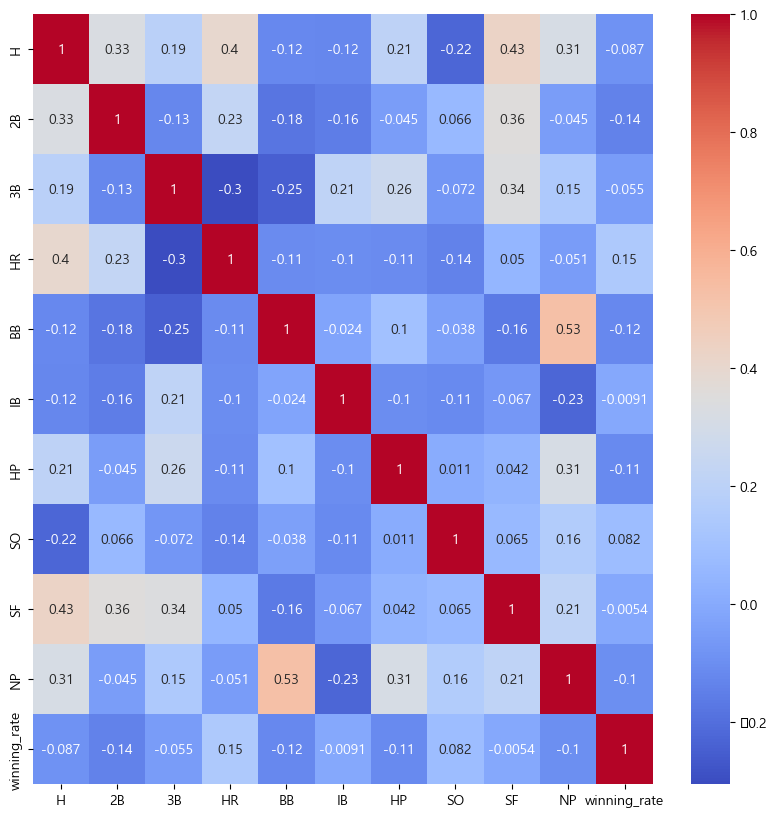

In [121]:
#타자
plt.figure(figsize=(10,10))

#상관계수 행렬을 히트맵으로 작성
sns.heatmap(
    data = df_team_win_hitter.corr(numeric_only=True),  #수치컬럼 간 상관계수 도출
    annot = True,   #상관계수 수치 표시
    cmap = 'coolwarm'   #컬러맵 지정
)

c:\Users\m\anaconda3\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()


<Axes: >

c:\Users\m\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  func(*args, **kwargs)
c:\Users\m\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


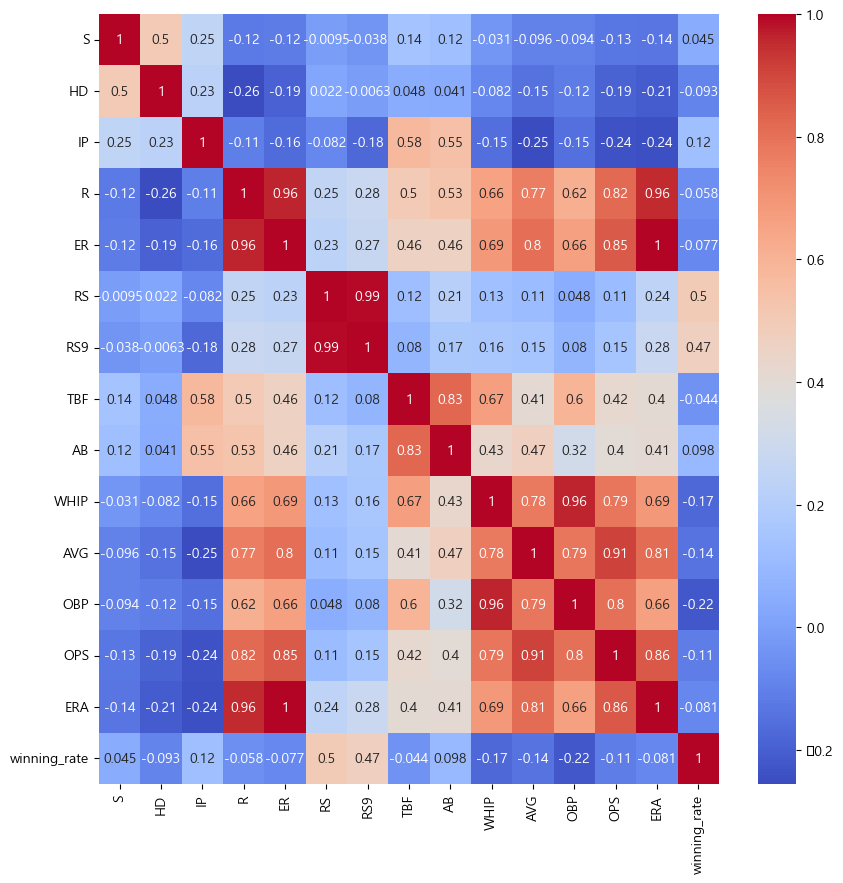

In [119]:
#투수
plt.figure(figsize=(10,10))

#상관계수 행렬을 히트맵으로 작성
sns.heatmap(
    data = df_team_win_pitcher.corr(numeric_only=True),  #수치컬럼 간 상관계수 도출
    annot = True,   #상관계수 수치 표시
    cmap = 'coolwarm'   #컬러맵 지정
)

In [178]:
#각 팀별 연도에 따른 승률
teams = ['삼성', '기아', '롯데', '두산', '한화', 'SSG', '키움', 'NC', 'KT']

#팀 10번 반복
team_columns = np.concatenate([np.repeat(team, 10) for team in teams])

df_team['team'] = team_columns

df_team_win = df_team[['Year', 'winning_rate', 'team']]
df_team_win = df_team_win.pivot_table(index='team', columns='Year')

df_team_win

winning_rate                                                          \
Year         2015   2016   2017   2018   2019   2020   2021   2022   2023   
team                                                                        
KT          12.70  13.33  13.10  12.68  18.84  10.98   8.22  10.59  10.87   
NC          15.38   7.41   7.46  11.11  11.43  10.34  10.96  11.49   6.98   
SSG          7.58   8.45  10.00   9.38   8.22  20.00   7.89   8.64  15.19   
기아          13.85  12.12   8.82  14.29  15.15  15.07  12.16  12.50   7.95   
두산          12.31   9.33   8.33   1.45   8.96   7.41   6.59  11.76  14.47   
롯데           8.11   9.30  10.61  10.67  15.15  10.77  11.84   8.97  12.05   
삼성           7.04  10.00  16.39  13.43  17.54  10.14  10.39  14.46  14.08   
키움           8.70  13.89  15.38  17.74  10.61   9.68  11.25  12.50  12.94   
한화           8.97  11.25  10.61  12.07  13.85  15.94  14.29  13.48  11.69   

             
Year   2024  
team         
KT    10.71  
NC    14.63  
SSG   13.75  
기아     3.95  
두산    11.84  
롯데    12.64  
삼성     9.86  
키움     8.22  
한화    10.26

In [189]:
df_team_win.iloc[0, :].values

array([12.7 , 13.33, 13.1 , 12.68, 18.84, 10.98,  8.22, 10.59, 10.87,
       10.71])

C:\Users\m\AppData\Local\Temp\ipykernel_11244\1956979842.py:8: MatplotlibDeprecationWarning: Passing label as a length 9 sequence when plotting a single dataset is deprecated in Matplotlib 3.9 and will error in 3.11.  To keep the current behavior, cast the sequence to string before passing.
  plt.plot(x_val, df_team_win.iloc[i, :].values, label=label_val)


IndexError: single positional indexer is out-of-bounds

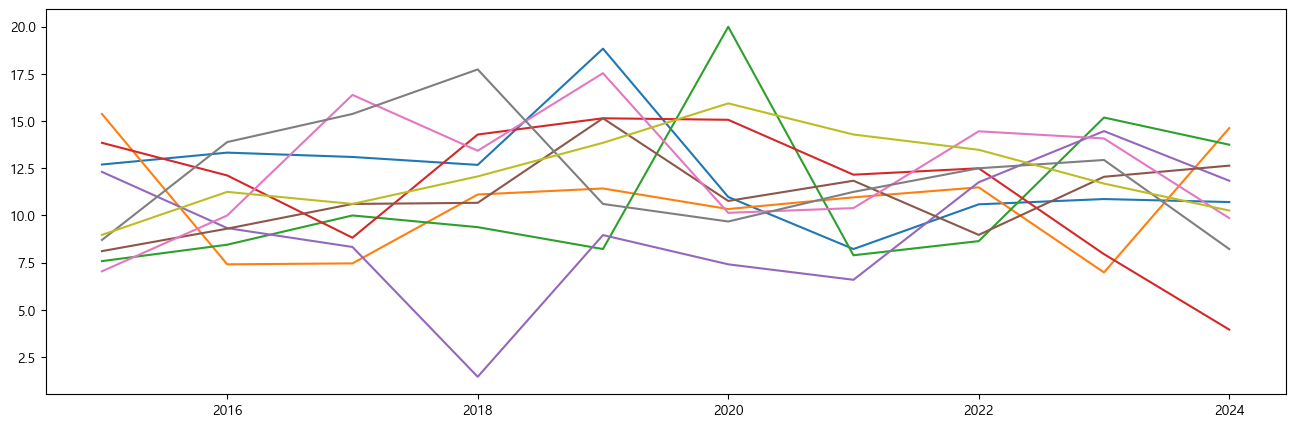

In [192]:
#x축
x_val = df_team_win.columns.get_level_values(1) #Year
label_val = df_team_win.index   #team

plt.figure(figsize=(16, 5))

for i in range(11):
    plt.plot(x_val, df_team_win.iloc[i, :].values, label=label_val)

plt.legend()
plt.show()

---

# 2. 화요일

## (1) 전체

In [ ]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

team_list = [1, 2, 3, 6, 7, 9, 11, 12, 13]  #삼성, 기아, 롯데, 두산, 한화, SSG, 키움, 엔씨, KT
df_team_thu_list = []    #전체 구단 데이터프레임 담을 리스트

for team in team_list:
    url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2014&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=2&hr=&ha&ct={}&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='.format(team)
    driver.get(url)

    try:
        div = WebDriverWait(driver, 20).until(
            EC.presence_of_element_located((By.CLASS_NAME, "table_type01"))
        )
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        div_content = soup.find('div', class_='table_type01 transverse_scroll cbox')

        print(team)
        print(url)

        if div_content:
            first_table = div_content.find('table') #첫 번째 table 태그만 가져옴

        #헤더 추출
        headers = [th.text.strip() for th in first_table.find_all('th')]

        #데이터프레임 컬럼을 만들기 위해 불필요한 헤더 삭제
        rm = ['Rank', 'Season', 'Year▲', '비율', 'Year']    #삭제할 헤더명
        idx = [i for i, x in enumerate(headers) if x in rm] #삭제할 헤더 index

        columns = [x for i, x in enumerate(headers) if i not in idx]    #삭제 후 남은 헤더
        columns[0] = 'Year' #컬럼명 변경: 정렬▲ → Year

        columns = np.array(columns)

        #각 컬럼값
        tr = div_content.find("tbody").find_all('tr')

        rows = []   #각 컬럼값 담을 리스트

        for tr in first_table.find('tbody').find_all('tr'):
            cells = [td.text.strip() for td in tr.find_all('td')]
            rows.append(cells)

        for i in range(len(rows)):
            rows[i] = rows[i][3:]   #불필요한 컬럼 삭제

        df = pd.DataFrame(rows, columns=columns)    #데이터프레임 생성
        df_team_thu_list.append(df) #생성한 데이터프레임 리스트에 추가

    except Exception as e:
        print("요소를 찾을 수 없음: ", e)

    
df_team_thu = pd.concat(df_team_thu_list)   #전체 데이터프레임 결합

#컬럼 순서 변경: 헤더 가져올 때 순서가 변경됨
col_list = list(df_team_thu.columns)
col_list[-5:] = ['WHIP', 'AVG', 'OBP', 'OPS', 'ERA']
df_team_thu.columns = col_list

#데이터타입 변경
df_team_thu = df_team_thu.astype(float)

#연도 데이터 타입 정수형으로 변경
df_team_thu.Year = df_team_thu.Year.astype(int)

df_team_thu

1
https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2014&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=2&hr=&ha&ct=1&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=
2
https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2014&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=2&hr=&ha&ct=2&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=
3
https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2014&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=2&hr=&ha&ct=3&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2=
6
https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2014&ey=2024&te=5002

,Year,G,GS,W,L,S,HD,IP,R,ER,...,IB,HP,SO,SF,NP,WHIP,AVG,OBP,OPS,ERA
0,2014,24.0,5.0,4.0,1.0,2.0,1.0,44.0,24.0,22.0,...,0.0,1.0,31.0,3.0,748.0,1.50,0.284,0.351,0.759,4.50
1,2015,10.0,2.0,2.0,0.0,2.0,0.0,18.0,7.0,4.0,...,0.0,1.0,11.0,0.0,302.0,1.17,0.172,0.293,0.559,2.00
2,2016,20.0,5.0,1.0,4.0,0.0,1.0,43.0,29.0,29.0,...,1.0,4.0,19.0,2.0,716.0,1.60,0.287,0.376,0.801,6.07
3,2017,9.0,3.0,3.0,0.0,0.0,2.0,27.0,11.0,11.0,...,0.0,1.0,22.0,1.0,391.0,1.19,0.252,0.289,0.672,3.67
4,2018,6.0,2.0,0.0,2.0,0.0,0.0,17.0,15.0,15.0,...,0.0,0.0,13.0,0.0,284.0,1.71,0.294,0.377,0.921,7.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2020,19.0,3.0,2.0,1.0,0.0,3.0,28.0,19.0,19.0,...,1.0,3.0,24.0,0.0,536.0,1.86,0.324,0.423,0.900,6.11
6,2021,14.0,3.0,1.0,1.0,1.0,4.0,27.0,15.0,15.0,...,0.0,1.0,30.0,0.0,478.0,1.44,0.248,0.336,0.660,5.00
7,2022,17.0,3.0,1.0,2.0,0.0,2.0,26.1,13.0,12.0,...,1.0,1.0,22.0,0.0,456.0,1.25,0.235,0.304,0.637,4.10
8,2023,16.0,3.0,1.0,2.0,1.0,3.0,26.0,20.0,18.0,...,0.0,2.0,20.0,0.0,467.0,1.62,0.288,0.373,0.825,6.23


In [55]:
#'승률' 컬럼 추가
df_team_thu['winning_rate'] = (df_team_thu['W'] / df_team_thu['G'] *100).round(2)
df_team_thu

,Year,G,GS,W,L,S,HD,IP,R,ER,...,HP,SO,SF,NP,WHIP,AVG,OBP,OPS,ERA,winning_rate
0,2014,24.0,5.0,4.0,1.0,2.0,1.0,44.0,24.0,22.0,...,1.0,31.0,3.0,748.0,1.50,0.284,0.351,0.759,4.50,16.67
1,2015,10.0,2.0,2.0,0.0,2.0,0.0,18.0,7.0,4.0,...,1.0,11.0,0.0,302.0,1.17,0.172,0.293,0.559,2.00,20.00
2,2016,20.0,5.0,1.0,4.0,0.0,1.0,43.0,29.0,29.0,...,4.0,19.0,2.0,716.0,1.60,0.287,0.376,0.801,6.07,5.00
3,2017,9.0,3.0,3.0,0.0,0.0,2.0,27.0,11.0,11.0,...,1.0,22.0,1.0,391.0,1.19,0.252,0.289,0.672,3.67,33.33
4,2018,6.0,2.0,0.0,2.0,0.0,0.0,17.0,15.0,15.0,...,0.0,13.0,0.0,284.0,1.71,0.294,0.377,0.921,7.94,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,2020,19.0,3.0,2.0,1.0,0.0,3.0,28.0,19.0,19.0,...,3.0,24.0,0.0,536.0,1.86,0.324,0.423,0.900,6.11,10.53
6,2021,14.0,3.0,1.0,1.0,1.0,4.0,27.0,15.0,15.0,...,1.0,30.0,0.0,478.0,1.44,0.248,0.336,0.660,5.00,7.14
7,2022,17.0,3.0,1.0,2.0,0.0,2.0,26.1,13.0,12.0,...,1.0,22.0,0.0,456.0,1.25,0.235,0.304,0.637,4.10,5.88
8,2023,16.0,3.0,1.0,2.0,1.0,3.0,26.0,20.0,18.0,...,2.0,20.0,0.0,467.0,1.62,0.288,0.373,0.825,6.23,6.25


In [56]:
df_team_thu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 0 to 9
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          93 non-null     int32  
 1   G             93 non-null     float64
 2   GS            93 non-null     float64
 3   W             93 non-null     float64
 4   L             93 non-null     float64
 5   S             93 non-null     float64
 6   HD            93 non-null     float64
 7   IP            93 non-null     float64
 8   R             93 non-null     float64
 9   ER            93 non-null     float64
 10  RS            93 non-null     float64
 11  RS9           93 non-null     float64
 12  TBF           93 non-null     float64
 13  AB            93 non-null     float64
 14  H             93 non-null     float64
 15  2B            93 non-null     float64
 16  3B            93 non-null     float64
 17  HR            93 non-null     float64
 18  BB            93 non-null     float64


In [57]:
df_team_thu.describe()

,Year,G,GS,W,L,S,HD,IP,R,ER,...,HP,SO,SF,NP,WHIP,AVG,OBP,OPS,ERA,winning_rate
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,2018.978495,12.784946,2.720430,1.225806,1.430108,0.451613,1.193548,24.174194,13.709677,12.150538,...,1.580645,19.806452,0.924731,413.075269,1.445699,0.265570,0.338935,0.730054,4.653548,9.646237
std,3.148424,5.233358,1.025391,1.084766,1.057045,0.651355,1.519855,9.265268,7.500117,6.868242,...,1.408997,9.259846,1.085843,155.375788,0.391908,0.059332,0.060015,0.153785,2.380568,8.577243
min,2014.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,124.000000,0.670000,0.133000,0.188000,0.321000,0.000000,0.000000
25%,2016.000000,9.000000,2.000000,0.000000,1.000000,0.000000,0.000000,17.000000,9.000000,7.000000,...,1.000000,12.000000,0.000000,293.000000,1.170000,0.227000,0.294000,0.630000,3.000000,0.000000
50%,2019.000000,13.000000,3.000000,1.000000,1.000000,0.000000,0.000000,26.000000,13.000000,11.000000,...,1.000000,20.000000,1.000000,415.000000,1.410000,0.258000,0.336000,0.720000,4.500000,8.330000
75%,2022.000000,17.000000,3.000000,2.000000,2.000000,1.000000,2.000000,29.000000,17.000000,16.000000,...,2.000000,26.000000,1.000000,536.000000,1.620000,0.298000,0.373000,0.826000,6.330000,16.670000
max,2024.000000,24.000000,5.000000,4.000000,4.000000,2.000000,7.000000,46.000000,36.000000,30.000000,...,6.000000,44.000000,4.000000,791.000000,2.690000,0.405000,0.478000,1.160000,10.900000,33.330000


In [ ]:
df_team_thu_win = df_team_thu[df_team_thu['winning_rate']]

## (3) 기아타이거즈

In [2]:
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

where_list = ['', 'H', 'N'] #전체, 홈, 원정
df_kia_thu_list = []    #전체, 홈, 원정 데이터프레임 담을 리스트

for where in where_list:
    #페이지 열기
    url = 'https://statiz.sporki.com/stats/?m=team&m2=pitching&m3=situation1&so=s_year&ob=&year=2024&sy=2014&ey=2024&te=5002&po=&lt=10100&reg=&pe=&ds=&de=&we=2&hr=&ha={}&ct=2&st=&vp=&bo=&pt=&pp=&ii=&vc=&um=&oo=&rr=&sc=&bc=&ba=&li=&as=&ae=&pl=&gc=&lr=&pr=50&ph=&hs=&us=&na=&ls=&sf1=&sk1=&sv1=&sf2=&sk2=&sv2='.format(where)

    #페이지 열기
    driver.get(url)

    #해당 클래스가 포함된 div가 나타날 때까지 대기 (최대 10초)
    try:
        div = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, "table_type01"))
        )
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        div_content = soup.find('div', class_='table_type01 transverse_scroll cbox')

        if div_content:
            first_table = div_content.find('table') #첫 번째 table 태그만 가져옴

        #헤더 추출
        headers = [th.text.strip() for th in first_table.find_all("th")]

        #데이터프레임 컬럼을 만들기 위해 불필요한 헤더 삭제
        rm = ['Rank', 'Season', 'Year▲', '비율', 'Year']    #삭제할 헤더명
        idx = [i for i, x in enumerate(headers) if x in rm] #삭제할 헤더 index

        columns = [x for i, x in enumerate(headers) if i not in idx]    #삭제 후 남은 헤더
        columns[0] = 'Year' #컬럼명 변경: 정렬▲ → Year

        columns = np.array(columns)

        #각 컬럼값
        tr = div_content.find("tbody").find_all('tr')

        rows = []   #각 컬럼값 담을 리스트

        for tr in first_table.find('tbody').find_all('tr'):
            cells = [td.text.strip() for td in tr.find_all('td')]
            rows.append(cells)

        for i in range(len(rows)):
            rows[i] = rows[i][3:]   #불필요한 컬럼값 삭제

        df = pd.DataFrame(rows, columns=columns)    #데이터프레임 생성
        df_kia_thu_list.append(df)  #생성한 데이터프레임 리스트에 추가

    except Exception as e:
        print("요소를 찾을 수 없음:", e)

    #print(url)

df_kia_thu = pd.concat(df_kia_thu_list) #3개의 데이터프레임(전체, 홈, 원정) 결합

#컬럼 순서 변경: 헤더 가져올 때 순서가 변경됨
col_list = list(df_kia_thu.columns)
col_list[-5:] = ['WHIP', 'AVG', 'OBP', 'OPS', 'ERA']
df_kia_thu.columns = col_list

df_kia_thu

,Year,G,GS,W,L,S,HD,IP,R,ER,...,IB,HP,SO,SF,NP,WHIP,AVG,OBP,OPS,ERA
0,2014,16,3,0,3,0,0,24.0,25,20,...,3,1,12,1,449,1.75,0.283,0.374,0.818,7.50
1,2015,14,4,3,1,1,2,38.0,13,10,...,1,2,35,1,564,1.00,0.206,0.268,0.547,2.37
2,2016,18,4,1,2,0,1,37.0,22,19,...,1,1,30,0,597,1.41,0.254,0.333,0.720,4.62
3,2017,14,3,1,2,0,0,28.0,12,12,...,1,2,25,1,498,1.36,0.248,0.333,0.743,3.86
4,2018,12,2,0,2,0,0,16.0,19,18,...,1,1,11,1,383,2.69,0.347,0.478,0.936,10.10
5,2019,12,3,3,0,0,0,27.0,9,8,...,0,2,15,0,414,1.15,0.233,0.295,0.577,2.67
6,2020,19,4,2,2,0,1,36.0,21,17,...,1,1,26,0,620,1.53,0.261,0.348,0.700,4.25
7,2021,8,2,0,2,0,0,17.0,13,12,...,0,1,12,0,316,1.88,0.324,0.407,0.914,6.35
8,2022,19,3,1,2,0,2,27.0,16,14,...,1,1,26,2,466,1.48,0.276,0.345,0.745,4.67
9,2023,5,1,1,0,1,1,9.0,3,3,...,1,0,2,0,128,1.44,0.286,0.342,0.771,3.00


In [3]:
df_kia_thu.shape

(30, 29)

In [4]:
df_kia_thu_total = df_kia_thu.iloc[:11]  #전체(홈+원정) 데이터프레임
df_kia_thu_home = df_kia_thu.iloc[11:19] #홈 데이터프레임
df_kia_thu_away = df_kia_thu.iloc[20:]   #원정 데이터프레임 